# Class : OOP 2

- 상속

- 에러와 예외

- EAFP & LBYL

## 상속

상속이란 ? 

    기존 클래스의 속성과 메서드를 물려받아 새로운 하위 클래스를 생성하는 것

1. 코드 재사용

    - 상속을 통해 기존 클래스의 속성과 메서드 재사용 가능

    - 새로운 클래스 생성 시 기존 클래스의 기능을 그대로 활용할 수 있음

2. 계층 구조

    - 클래스들 간 계층 구조 형성 가능

    - 부모 클래스와 자식 클래스 간의 관계를 표현하고, 더 구체적인 클래스 생성 가능

3. 유지 보수의 용이성

    - 상속을 통해 기존 클래스의 수정이 필요한 경우, 해당 클래스만 수정하면 됨

    - 코드의 일관성 유지, 수정이 필요한 범위 최소화

<br>

### 클래스 상속

<br>

```python
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    def talk(self):
        print(f"반갑습니다. {self.name}입니다.")
        
class Professor(Person):        # 부모클래스의 이름을 파라미터로 설정
    def __init__(self, name, age, major):
        self.name = name
        self.age = age
        self.major = major
        
class Student(Person):
    def __init__(self, name, age, gpa):
        self.name = name
        self.age = age
        self.gpa = gpa
        
p1 = Professor('박교수', 49, 'CS')
s1 = Student('김학생', 20, 4.1)

# 부모 클래스(Person)의 talk 메서드 활용
p1.talk()       # 반갑습니다. 박교수입니다.
s1.talk()       # 반갑습니다. 김학생입니다.
```

<br>

위 코드에서 생각해야 할 점 : 부모 코드의 내장 함수를 물려받을 수 있지 않을까 ?

    --> super() 사용

        : 부모 클래스의 메서드를 호출하기 위해 사용되는 내장 함수

            - 부모 클래스의 모든 내장함수에 super()를 사용하여 불러올 수 있다.

            - super()는 무조건 상속 순서대로 불러온다.

<br>

```python
# 사용 전
class Person:
    def __init__(self, name, age, email):
        self.name = name
        self.age = age
        self.email = email

    def talk(self):
        print(f"반갑습니다. {self.name}입니다.")
        
class Student(Person):
    def __init__(self, name, age, std_id, email, gpa):
        self.name = name
        self.age = age
        self.std_id = std_id
        self.email = email
        self.gpa = gpa


# 사용 후
class Person:
    def __init__(self, name, age, email):
        self.name = name
        self.age = age
        self.email = email

    def talk(self):
        print(f"반갑습니다. {self.name}입니다.")
        
class Student(Person):
    def __init__(self, name, age, std_id, email, gpa):
        # Person.__init__(self, name, age)
        super().__init__(name, age, email)
        self.std_id = std_id
        self.gpa = gpa
```

- super()를 사용하면 다중 부모 클래스를 갖는 경우, 파라미터로 지정하여 특정 클래스의 정보를 가져올 수 있다.

<br>

### 다중 상속

- 두 개 이상의 클래스를 상속받는 경우

- 상속받은 모든 클래스의 요소를 활용 가능함

- 중복된 속성이나 메서드가 있는 경우 ***상속 순서에 의해 결정***됨



In [2]:
# ex)

class Person:
    gene = 'XYZ'
    def __init__(self, name):
        self.name = name

    def greeting(self):
        print(f"안녕, {self.name}")


class Mom(Person):
    gene = 'XX'        

    def __init__(self, name, age):
        super().__init__(name)
        self.age = age
        
    def swim(self):
        return '엄마 수영'
    

class Dad(Person):
    gene = 'XY'        

    def __init__(self, name):
        super().__init__(name)

    def walk(self):
        return '아빠 산책'
    

class FirstChild(Dad, Mom):
    gene = Mom.gene     # 특정 클래스의 클래스변수를 받아오고 싶을 경우, new 변수 = 상속받고자 하는 클래스.클래스변수

    def __init__(self, name, age):
        # super().__init__(name)      # Dad의 init만 나올 수밖에 없다.
        Mom.__init__(self, name, age)        # 이렇게 작성하면 Mom 클래스의 정보를 가져올 수 있다.
        # 다중 클래스 상속에서 어떤 부모 클래스의 init이 달라질 경우 super() 대신 두번째 방법을 사용하자 !!
        # 하지만 아주 특별한 경우가 아니라면 두번째 방법의 사용은 지양한다.

    def cry(self):
        return '첫째 응애'
    
    def swim(self):
        return '첫째 수영'
    
    

baby1 = FirstChild('아가', 42)
print(baby1.cry())
print(baby1.swim())
print(baby1.walk())
print(baby1.gene)           # Dad가 Mom보다 먼저 나왔기 떄문에 Dad의 gene을 불러옴
print(FirstChild.mro())

<bound method Dad.walk of <__main__.FirstChild object at 0x00000221A62E7FD0>>
첫째 응애
첫째 수영
아빠 산책
XX
[<class '__main__.FirstChild'>, <class '__main__.Dad'>, <class '__main__.Mom'>, <class '__main__.Person'>, <class 'object'>]


    --> mro()

        - Method Resolution Order

        - 해당 인스턴스의 클래스가 어떤 부모 클래스를 가지는지 확인하는 메서드

        - 기존 인스턴스 -> 클래스 순으로 이름 공간을 탐색하는 과정에서 상속 관계에 있으면 인스턴스 -> 자식 클래스 -> 부모 클래스 로 확장

## Errors & Exception

### 디버깅

-> 소프트웨어에서 발생하는 버그를 찾아내고 수정하는 과정.

-> 프로그램의 오작동 원인을 식별하여 수정하는 작업

<br>

### 에러

--> 프로그램 실행 중에 발생하는 예외 상황

- 문법 에러(Syntax Error) : 프로그램의 구문이 올바맂 않은 경우 발생

    - 오타, 괄호 및 콜론 누락 등의 문법적 오류

    1. Invalid syntax : 문법 오류

    2. assign to literal : 잘못된 할당

    3. EOL(End of Line) : 괄호를 안닫았을 경우

    4. EOF(End of File)

<br>

- 예외(Exception) : 프로그램 실행 중에 감지되는 에러

    - 내장 예외 : 파이썬에서 이미 정의되어 있으며, 특정 예외 상황에 대한 처리를 위해 사용

        1. ZeroDivisionError : 나누기 또는 모듈로 연산의 두번째 인자가 0일 떄 발생

            ex) 10 / 0

        2. NameError : 지역 / 전역 변수를 찾을 수 없을 때

        3. TypeError : 
        
            3-1. 타입 불일치

                ex) '2' + 2

            3-2. 인자 누락

                ex) sum()

            3-3. 인자 초과

                ex) sum(1, 2, 3)

            3-4. 인자 타입 불일치

        4. ValueError : 연산이나 함수에 문제가 없지만 부적절한 값을 인자로 받았고, 상황이 IndexError처럼 더 구체적인 예외로 설명되지 않는 경우

            ex) int('1.5')

            ex) range(3).index(6)

        5. IndexError : 시퀀스 인덱스가 범위를 벗어날 떄 발생

            ex) List index out of range

        6. KeyError : 딕셔너리에 해당 키가 존재하지 않는 경우

        7. ModuleNotFoundError : 모듈을 찾을 수 없을 떄 발생

        8. importError : import 하려는 이름을 찾을 수 없을 떄 발생

        9. KeyboardInterrupt : 사용자가 Ctrl + C 또는 Delete를 누를 떄 발생

            -> 무한루프 시 강제 종료할 경우 사용됨

        10. IndentationError : 잘못된 들여쓰기 

<br>

- 예외 처리(try - except)

```python
try:
    # 예외가 발생할 수 있는 코드

except 예외:
    # 예외 처리 코드
```

In [42]:
# ex) 

try:
    result = 10 / 0
except ZeroDivisionError:
    print('0으로 못 나눠')

0으로 못 나눠


1. 먼저 발생가능한 에러가 어떤 것인지 예상해보고

2. 발생 가능한 에러를 모두 명시하거나 별도로 작성

    ex)

    ```python
    try:
        pass
    except (ValueError, ZeroDivisionError):
        print('제대로 입력해')
    except:
        print('원인불명 이유 발생')
        
    ```

    혹은,

    ```python
    try:
        pass
    except ValueError:
        print('숫자 입력')
    except ZeroDivisionError:
        print('0은 입력 불가')
    except:
        print('원인불명 이유 발생')
    ```

<br>

!! 주의사항 !!

- 내장 예외 클래스는 상속 계층구조를 갖기 떄문에 except 절로 분기 시 반드시 ***하위 클래스를 먼저 확인할 수 있도록 작성***해야 한다.

<https://docs.python.org/ko/3/library/exceptions.html>

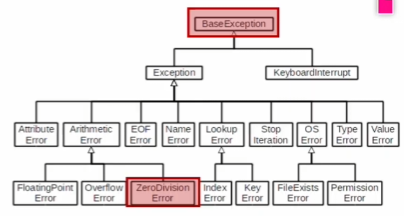


## EAFP & LBYL

-> 예외처리와 값 검사에 대한 2가지 접근 방식

<br>

### EAFP(try - except)

-> 예외처리를 중심으로 코드를 작성하는 접근 방식

    - 일단 실행하고 예외를 처리

    - 코드를 실행하고 예외가 발생하면 예외처리를 수행

    - 예외 상황을 예측하기 어려운 경우에 유용

### LBYL(if - else)

-> 값 검사를 중심으로 코드를 작성하는 접근 방식

    - 실행하기 전에 조건을 검사

    - 조건문을 사용하여 예외 사항을 미리 검사하고, 예외상황을 피하는 방식

    - 예외 상황을 미리 방지하고 싶을 때 유용

#### 추가

as 키워드 : except에서 에러 메세지를 except 블록에서 사용할 수 있도록 해준다.